In [1]:
import numpy as np
import pandas as pd

## 1. Handling Missing Data
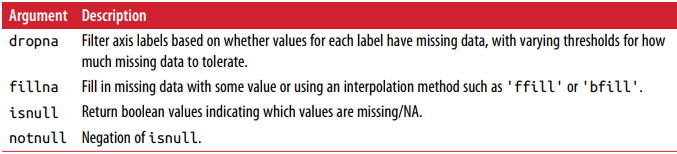

In [4]:
s = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado', None])
s

0     aardvark
1    artichoke
2          NaN
3      avocado
4         None
dtype: object

In [5]:
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

### Filtering Out Missing Data

In [6]:
s.dropna()

0     aardvark
1    artichoke
3      avocado
dtype: object

In [8]:
s[~s.isnull()]

0     aardvark
1    artichoke
3      avocado
dtype: object

In [10]:
s[s.notnull()]

0     aardvark
1    artichoke
3      avocado
dtype: object

In [12]:
data = pd.DataFrame([[1., 6.5, 3.], [1., None, None],
                     [None, None, None], [None, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [13]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [14]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [16]:
data.isnull().sum()

0    2
1    2
2    2
dtype: int64

In [18]:
data.isnull().sum(axis=1)

0    0
1    2
2    3
3    1
dtype: int64

In [25]:
df3 = pd.DataFrame({'a': [1,1]+[np.nan]*3,
                    'b': [6.5, None, None, 6.5, None],
                    'c': [3, None, None, 3, None],
                    'd': [np.nan]*5})
df3

,a,b,c,d
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN
4,NaN,NaN,NaN,NaN


In [26]:
ser = df3.isnull().sum() / df3.shape[0]
col_to_drop = ser[ser > 0.9].index
df3.drop(col_to_drop, axis=1)

,a,b,c
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0
4,NaN,NaN,NaN


In [22]:
df = pd.DataFrame({'name': ['Alfred', 'Batman', 'Catwoman'],
                  'toy': [None, 'Batmobile', 'Bullwhip'],
                  'born': [None, '1940-04-25', None]})
df

,name,toy,born
0,Alfred,None,None
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,None


In [23]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,None


In [24]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,None


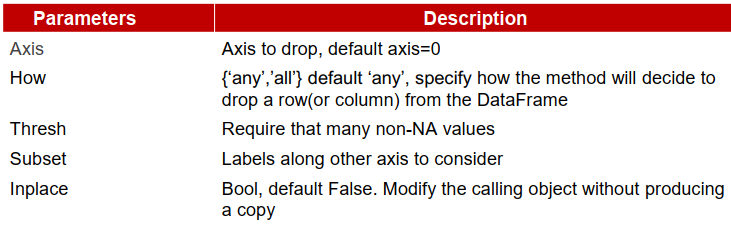

Use the dropna method to drop columns that contain at least 90 percent null value

In [30]:
df.dropna(thresh=0.1 * df.shape[0], axis=1)

,name,toy,born
0,Alfred,None,None
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,None


In [29]:
df3.dropna(thresh=0.1 * df3.shape[0], axis=1)

,a,b,c
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0
4,NaN,NaN,NaN


### Filling In Missing Data
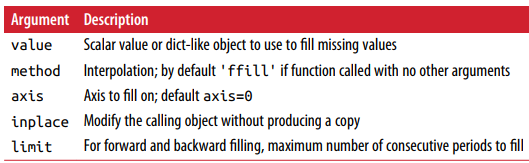

In [31]:
df3.fillna(0)

,a,b,c,d
0,1.0,6.5,3.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,6.5,3.0,0.0
4,0.0,0.0,0.0,0.0


In [33]:
df3.fillna({'a': 1, 'c': 9})

,a,b,c,d
0,1.0,6.5,3.0,NaN
1,1.0,NaN,9.0,NaN
2,1.0,NaN,9.0,NaN
3,1.0,6.5,3.0,NaN
4,1.0,NaN,9.0,NaN


In [35]:
df2 = pd.DataFrame(np.random.randn(6, 3))
df2.iloc[2:, 1] = None
df2.iloc[4:, 2] = None
df2

,0,1,2
0,0.147434,-0.312902,0.355042
1,-0.557849,-0.328524,-0.136618
2,1.192485,NaN,0.855390
3,-0.796746,NaN,2.019663
4,-1.536197,NaN,NaN
5,-0.227423,NaN,NaN


In [36]:
df2.fillna(method='ffill')

,0,1,2
0,0.147434,-0.312902,0.355042
1,-0.557849,-0.328524,-0.136618
2,1.192485,-0.328524,0.855390
3,-0.796746,-0.328524,2.019663
4,-1.536197,-0.328524,2.019663
5,-0.227423,-0.328524,2.019663


In [37]:
df2.fillna(method='ffill', limit=2)

,0,1,2
0,0.147434,-0.312902,0.355042
1,-0.557849,-0.328524,-0.136618
2,1.192485,-0.328524,0.855390
3,-0.796746,-0.328524,2.019663
4,-1.536197,NaN,2.019663
5,-0.227423,NaN,2.019663


In [48]:
df4 = pd.DataFrame(np.arange(20).reshape((5,4)),
                   columns=['a', 'b', 'c', 'd'])
df3, df4

(     a    b    c   d
 0  1.0  6.5  3.0 NaN
 1  1.0  NaN  NaN NaN
 2  NaN  NaN  NaN NaN
 3  NaN  6.5  3.0 NaN
 4  NaN  NaN  NaN NaN,
     a   b   c   d
 0   0   1   2   3
 1   4   5   6   7
 2   8   9  10  11
 3  12  13  14  15
 4  16  17  18  19)

In [45]:
df3.fillna(df4)

,a,b,c,d
0,1.0,6.5,3.0,3.0
1,1.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0
3,12.0,6.5,3.0,15.0
4,16.0,17.0,18.0,19.0


In [47]:
df3.fillna(df4.drop('d', axis=1))

,a,b,c,d
0,1.0,6.5,3.0,NaN
1,1.0,5.0,6.0,NaN
2,8.0,9.0,10.0,NaN
3,12.0,6.5,3.0,NaN
4,16.0,17.0,18.0,NaN


## STATISTICAL IMPUTATION
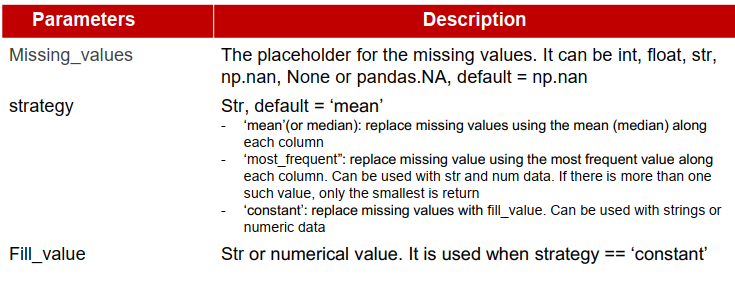

In [49]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

mean_imputer.fit(df3)
# pd.DataFrame(result_mean_imputer, columns=list('ABCD'))

SimpleImputer()

In [50]:
mean_imputer.statistics_

array([1. , 6.5, 3. , nan])

In [51]:
median_imputer = SimpleImputer(strategy='median')
result_median_imputer = median_imputer.fit_transform(df3)
pd.DataFrame(result_median_imputer, columns=list('ABC'))

,A,B,C
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0
4,1.0,6.5,3.0


In [52]:
most_fr_imputer = SimpleImputer(strategy='most_frequent')
result_most_fr_imputer = most_fr_imputer.fit_transform(df3)
pd.DataFrame(result_most_fr_imputer, columns=list('ABC'))

,A,B,C
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0
4,1.0,6.5,3.0


In [53]:
constant_imputer = SimpleImputer(strategy='constant', fill_value=99)
result_constant_imputer = constant_imputer.fit_transform(df3)
pd.DataFrame(result_constant_imputer, columns=list('ABCD'))

,A,B,C,D
0,1.0,6.5,3.0,99.0
1,1.0,99.0,99.0,99.0
2,99.0,99.0,99.0,99.0
3,99.0,6.5,3.0,99.0
4,99.0,99.0,99.0,99.0


### KNN

In [54]:
from sklearn.impute import KNNImputer
X = pd.DataFrame([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
imputer = KNNImputer(n_neighbors=2)
result = pd.DataFrame(imputer.fit_transform(X))

In [55]:
X

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


In [56]:
result

,0,1,2
0,1.0,2.0,4.0
1,3.0,4.0,3.0
2,5.5,6.0,5.0
3,8.0,8.0,7.0


### OUTLIERS

In [57]:
from numpy.random import randn

data = 5*randn(1000) + 50
m = data.mean()
s = data.std()

In [58]:
x1 = m - 3*s
x2 = m + 3*s
(x1,x2)

(34.91839929116592, 64.7467910701353)

In [59]:
outliers = [x for x in data if x < x1 and x > x2]
outliers

[]

## 3. String Manipulation
### String Obj Methods
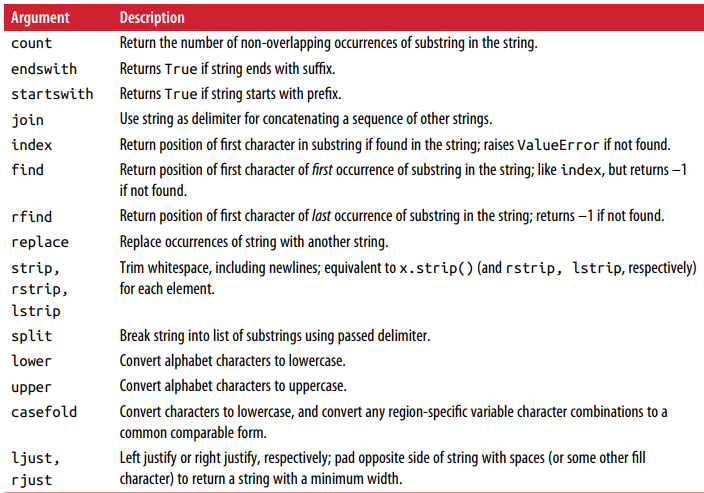

In [60]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [62]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [63]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [64]:
'::'.join(pieces)

'a::b::guido'

In [69]:
val.index('b'), val.index('g')

(2, 6)

In [71]:
val.find('a'), val.find('h')

(0, -1)

In [73]:
# the diff bw .find and .index: raise error
val.index('h')

ValueError: substring not found

In [74]:
val.replace(',', '::')

'a::b::  guido'

In [76]:
data = ['peter', 'paul', 'Mary', 'joHn']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'John']

### RegEx
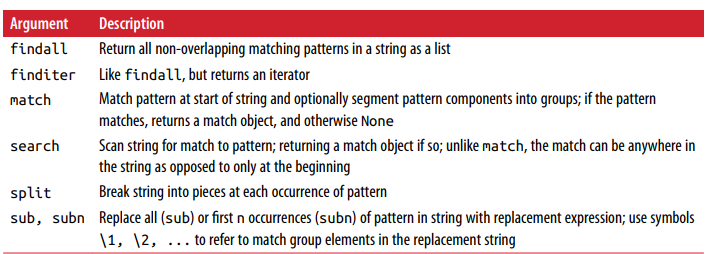

In [75]:
import re

In [77]:
text = "foo bar\t baz \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [79]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [80]:
regex.findall(text)

[' ', '\t ', ' \t']

In [82]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [83]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [84]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [85]:
text[m.start(): m.end()]

'dave@google.com'

In [111]:
# re.search(): return if found ANYWHERE
# re.match(): checks only at beginning of str.
print(re.match('c', 'abcdef'))
print(re.search('c', 'abcdef'))

None
<re.Match object; span=(2, 3), match='c'>


In [88]:
print(regex.sub('MASK', text))

Dave MASK
Steve MASK
Rob MASK
Ryan MASK



In [90]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [91]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

sub also has access to groups in each match using special symbols like \1 and \2. The
symbol \1 corresponds to the first matched group, \2 corresponds to the second, and
so forth:

In [92]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [112]:
# re.finditer(pat, text)
text = 'He was carefully disguised but captured quickly by police.'
for m in re.finditer(r'\w+ly\b', text):
    print('%02d-%02d: %s' % (m.start(), m.end(), m.group()))

07-16: carefully
40-47: quickly


### Vectorized String Functions in Pd
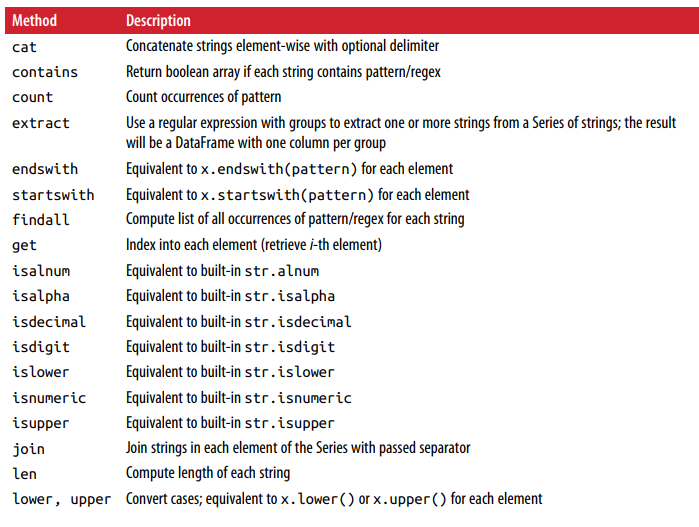
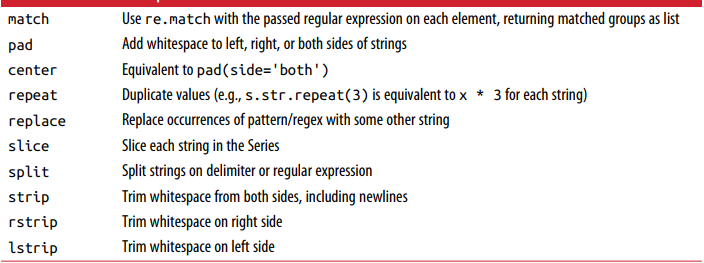

In [94]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [95]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [96]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [97]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [98]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [100]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [105]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

In [107]:
names = pd.Series(['peter', 'Paul', 'MARY', 'jOhn'])
names

0    peter
1     Paul
2     MARY
3     jOhn
dtype: object

In [108]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3     John
dtype: object

In [109]:
data = ['Swiss franc', 'Iceland krone', 'Danish krone', 'Norwegian krone', 'Canadian dollar']
cur_unit = pd.Series(data)
cur_unit

0        Swiss franc
1      Iceland krone
2       Danish krone
3    Norwegian krone
4    Canadian dollar
dtype: object

In [110]:
curr = pd.DataFrame({'CurrencyUnit': cur_unit, 'CurrencyUnit2': cur_unit.str.split().str.get(1)})
curr

,CurrencyUnit,CurrencyUnit2
0,Swiss franc,franc
1,Iceland krone,krone
2,Danish krone,krone
3,Norwegian krone,krone
4,Canadian dollar,dollar
